# 프로젝트 설명

워싱턴 D.C 의 Capital Bikeshare 프로그램에서 자전거 대여 수요를 예측하기 위한 프로젝트이다. 과거 사용 패턴을 날씨 데이터와 결합하여 수요 예측을 수행해 본다.
- www.kaggle.com/c/bike-sharing-demand/

# 프로젝트 목표

특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측한다.

# 데이터 설명

- train.csv : 학습 데이터
- test.csv : 테스트 데이터
- SampleSubmission.csv : 제출 형식 샘플


- 데이터 내용
    - Datetime : 시간 (YYYY-MM-DD 00:00:00)
    - Season : 봄(1) 여름(2) 가을(3) 겨울(4)
    - Holiday : 공휴일(1) 그외(0)
    - Workingday : 근무일(1) 그외(0)
    - Weather : 아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박(4)
    - Temp : 온도(섭씨)
    - Atemp : 체감온도(섭씨)
    - Humidity : 습도
    - Windspeed : 풍속
    - Casual : 비회원의 자전거 대여량
    - Registered : 회원의 자전거 대여량
    - Count : 총 자전거 대여량 (비회원+회원)

# 데이터 확인

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

%matplotlib inline

## data 불러오기

In [2]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/bike-sharing-demand/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/bike-sharing-demand/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이콘/bike-sharing-demand/sampleSubmission.csv')

In [3]:
import os

path = "/content/drive/MyDrive/데이콘/bike-sharing-demand"
train = pd.read_csv(os.path.join(path, "train.csv"))
test = pd.read_csv(os.path.join(path, "test.csv"))
submission = pd.read_csv(os.path.join(path, "sampleSubmission.csv"))

In [ ]:
# .py 파일을 수행하는 경우, 파일의 디렉토리를 활용하여 경로 만들 수 있음
train = os.path.join(os.path.dirname(__file__), "train.csv")
test = os.path.joun(os.path.dirname(__file__), "test.csv")
submission = os.path.join(os.path.dirname(__file__), "sampleSubmission.csv")

## 데이터 확인

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# datetime -> 날짜 : to_datetime

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

# EDA

## 기준별 자전거 수요량 확인해보기(카테고리, 시각화)

In [6]:
# datetime -> 연, 월, 일, 시, 분, 초 => 수요량이 어떻게 변하는지
# 주 단위로 확인 -> datetime 패키지에서 지원하는 dayofweek
# #월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

- countplot과 barplot의 차이는 y축 설정 여부, 숫자가 들어있는 column으로 y축을 설정한다
- 분석하는 숫자에 소수점이나 정수가 들어가면 y축에 그 컬럼을 넣고 barplot
- 분석하는 것에 숫자가 필요없으면 countplot
- label 기준으로 생각하면 쉽다!
    - survived 같은 classification 문제인 경우 hue에 survived를 놓고 countplot
    - year 같은 regression 문제인 경우 y축에 year를 놓고 barplot
    ```
    sns.barplot(data=train, x='pclass', y='fare', hue='survived')
    sns.countplot(data=train, x='pclass', hue='survived')
    ```

- pointplot은 barplot과 같은 코드지만, 모양에 차이가 있다.
    - x축이 서로간의 연관성이 있으면(시간 등등 continuous) pointplot
    - x축이 서로간의 연관성이 없으면(discrete) barplot
    ```
    sns.pointplt(data=train, x='pclass', y='fare', hue='survived')
    ```

- distplot : 선그래프로 변화 추이를 나타내기 위한 시각화
- 주의할 점은 다른 방식과 다르게 먼저 column을 뽑아내는 작업 후 감싸듯이 distplot 불러와 적용
- distplot을 불러오면 막대그래프와 선그래프가 동시에 등장
    - 보통은 막대그래프(히스토그램) 필요한 경우 거의 없어서 hist=False 해줘서 선그래프만 나타내기
- 작관적으로 분석하기 좋기 때문에 아웃라이어 제거하는 작업이 특히 중요
- 가우시안 분포로 이해하면 좋다.
    - 정규분포 모양이 가장 이상적
    - 직관적으로 작은 봉우리처럼 툭툭 튀어나오는 부분이 있으면 그 부분에 집중해 분석
    ```
    sns.distplot(train['year'], hist=False)
    ```

- LMplot : 직관적으로 데이터를 살펴보기에 중요, 아웃라이어 제거 작업 중요
- fit_reg=False 코드 입력하여 회귀선을 제거하여 표현 가능
- 분석하고자 하는 두 feature컬럼을 x축(나이)과 y축(요금)으로 설정, 그에 따라 비교하고자 하는 결과값(생존여부)을 hue에 설정
    - 특정 위치에 점이 많이 찍혀있다면, 즉, 요금이 200이 넘을때나 나이가 10세 미만일 때 생존율이 높다

- subplot : 여러가지 방식을 한꺼번에 화면에 띄울 수 있는 툴
```
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.countplot(data=train, x='pclass', hue='survived', ax=ax1)
sns.countplot(data=train, x='sex', hue='survived', ax=ax2)
...
```

<Axes: xlabel='year', ylabel='count'>

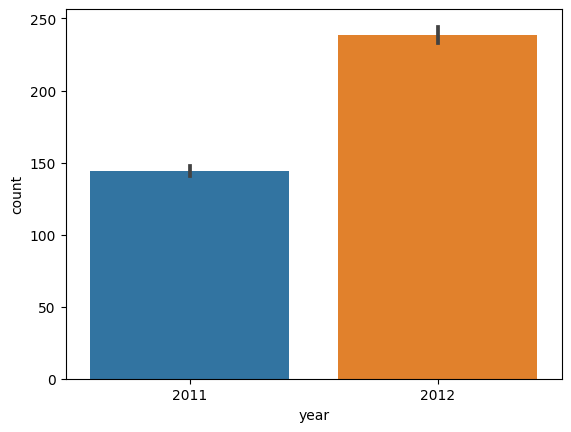

In [7]:
# year별 자전거 수요량
# hue에 어떤 컬럼을 적으면 그 컬럼을 기준으로 데이터를 쪼갠다
# 만약에 count 컬럼이 없었다면
# region_category = train['지역 유형'].value_counts().sort_index() -> count 컬럼 생성해서 작업
# sns.barplot(x = region_category.index, y = region_category.values)

sns.barplot(data=train, x='year', y='count')


- 년도가 증가함에 따라 갑자기 수요량이 증가, 하지만 단 두개의 year만 존재하기 때문에 지속적으로 수요가 증가하는지에 대한 여부는 알 수 없고, 단지 해당 자전거 대여 회사가 성장했다 or 자전거 수요가 늘었다. 까지만 알 수 있다.
- 2012년에 갑자기 자전거가 대유행해서 , 2013년에는 줄어들수도,,, 늘어날수도 있다는 것!
- 년도별로 수요량의 차이가 존재하니까 예측하는데 year변수를 사용할 수는 있겠다.

<Axes: xlabel='month', ylabel='count'>

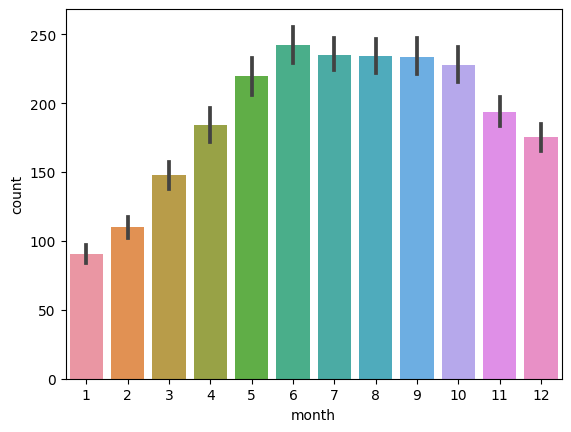

In [8]:
# month별 자전거 수요량
sns.barplot(data=train, x='month', y='count')

- 비교적 12, 1, 2월에 자전거 수요량이 적다
- 6, 7, 8월에 자전거 수요량이 가장 많음을 알 수 있다. 따라서 month 변수도 예측에 사용할 수 있겠다.

<Axes: xlabel='day', ylabel='count'>

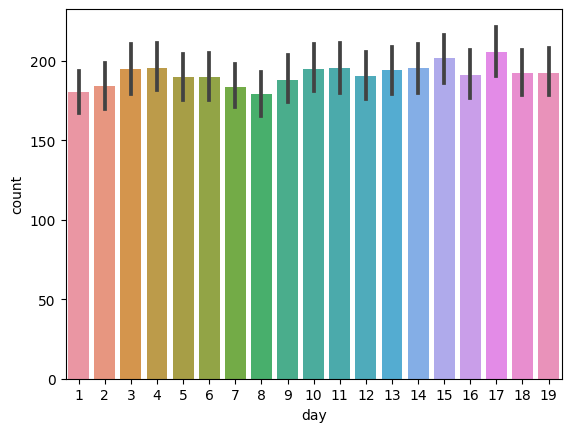

In [9]:
# day별 자전거 수요량
sns.barplot(data=train, x='day', y='count')

- day별로 자전거 수요량이 달라짐을 알 수있다.
- 명백한 차이가 없기 떄문에 변수에서 제거하거나 제거하지 않거나에 대한 선택은 나중에 해보겠다.

<Axes: xlabel='season', ylabel='count'>

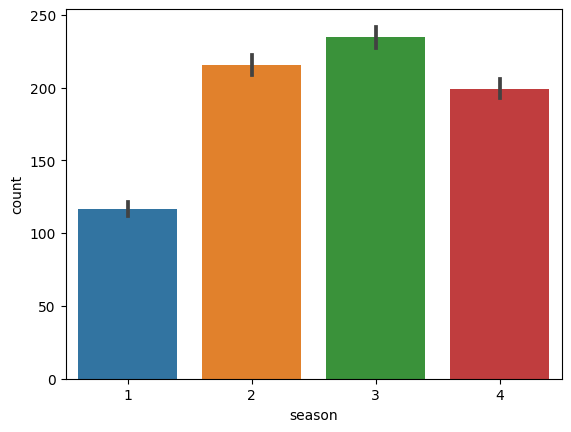

In [10]:
# season 계절별 자전거 수요량
sns.barplot(data=train, x='season', y='count')

- 월별로 출력했을 때 분명, 12,1,2월(겨울)에 가장 수요량이 적었는데, 위 season 그래프와는 다르게 나왔다.
- season을 나누는 경계가 다름?
- 계절에 따라 수요량의 차이가 존재하기에, season도 예측하는데 사용

In [11]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


<Axes: xlabel='hour', ylabel='count'>

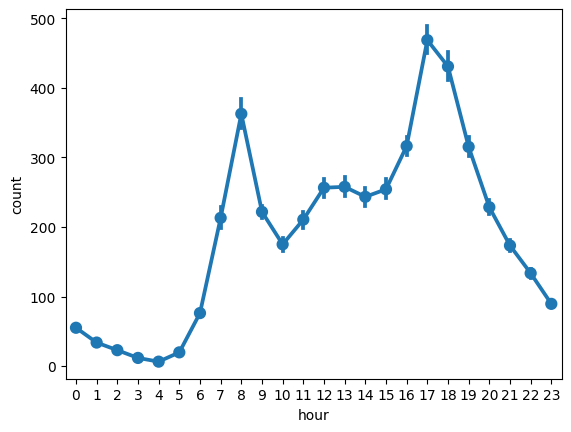

In [ ]:
# 시간대별 pointplot

sns.pointplot(data=train, x='hour', y='count',)

- 시간대별로 보았을때, 8시 , 17시경에 가장 자전거 수요량이 많다. (출, 퇴근시간임을 알 수 있다.)

<Axes: xlabel='hour', ylabel='count'>

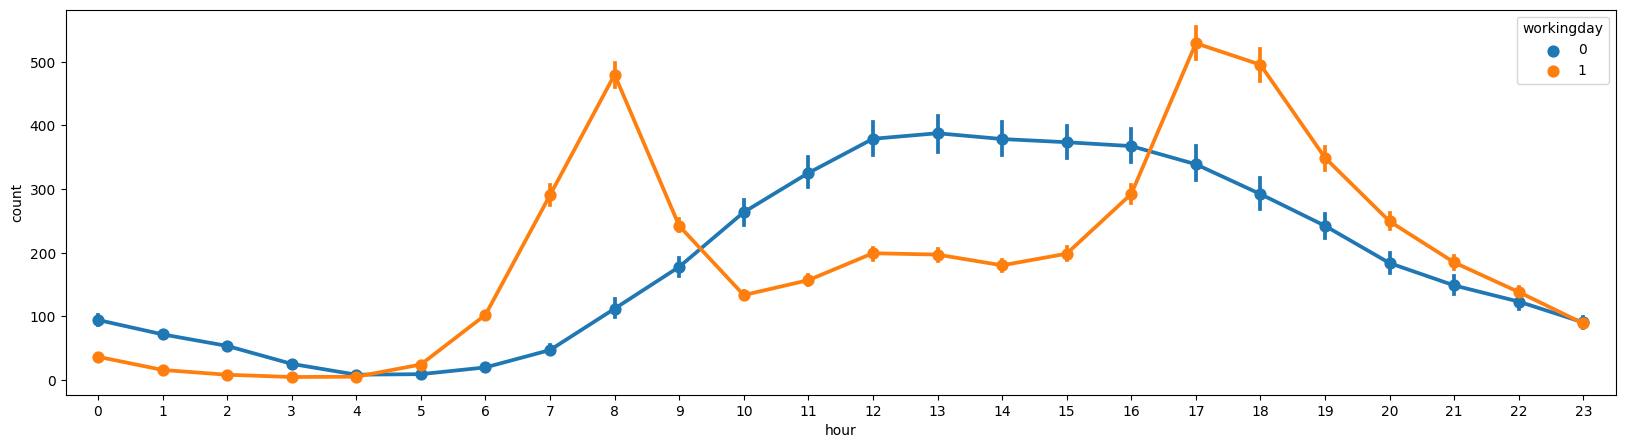

In [ ]:
# workingday(카테고리), 시간대별로 pointplot 확인
fig, (ax1) = plt.subplots(1,1)
# fig.set_Size_inches(20,5)
fig.set_size_inches(20, 5)

# seaborn에서 카테고리형 데이터를 고려한 그래프를 출력하고 싶으면, hue 변수 추가
# 시간대별로 workingday==1 일때, workingday==0 일때 출력됨
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax1)

- 1: 근무일 / 0: 근무일 아닐 때
- 근무일에는 출퇴근 시간에 수요량이 급증하고, 근무일이 아닐 때에는 오후시간대에 수요량이 증가하는 것을 알 수 있다. 따라서 holiday 변수도 예측에 영향을 줄 것이라고 판단했다.

<Axes: xlabel='hour', ylabel='count'>

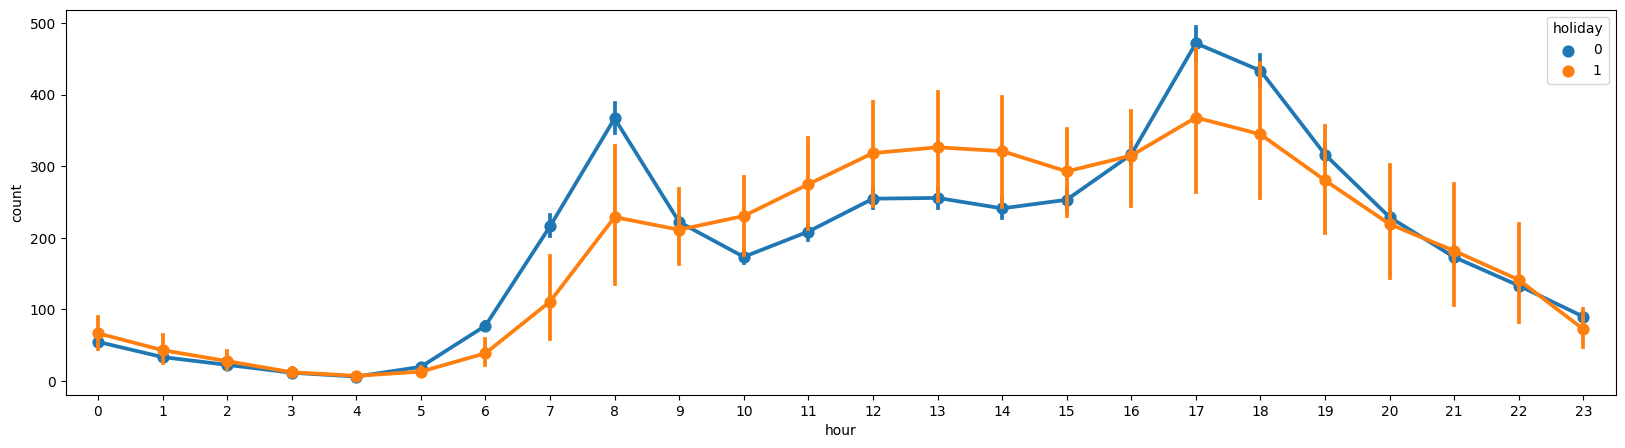

In [ ]:
# holiday(카테고리), 시간대별로 point plot 확인
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20,5)
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=ax1)

- 1: 휴일 / 0: 휴일이 아닐때
- 휴일이 아닐때는 출,퇴근시간대에 자전거의 수요가 증가하고, 휴일일 때는 오후 시간대에 증가한다. 따라서 holiday 변수도 에측하는데 사용해보려고 한다.

<Axes: xlabel='hour', ylabel='count'>

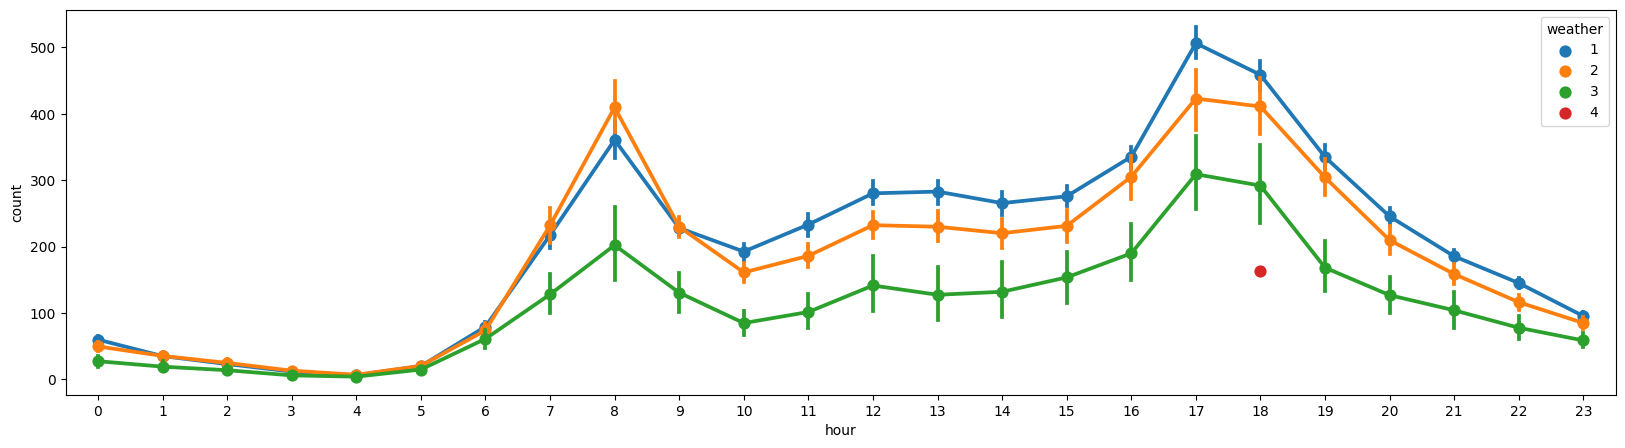

In [ ]:
# weather(카테고리), 시간대별로 point plot 확인
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20,5)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax1)

- 아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박(4)
- 1,2번날씨 > 3번날씨 > 4번날씨는 데이터가 거의 없음

<Axes: xlabel='hour', ylabel='count'>

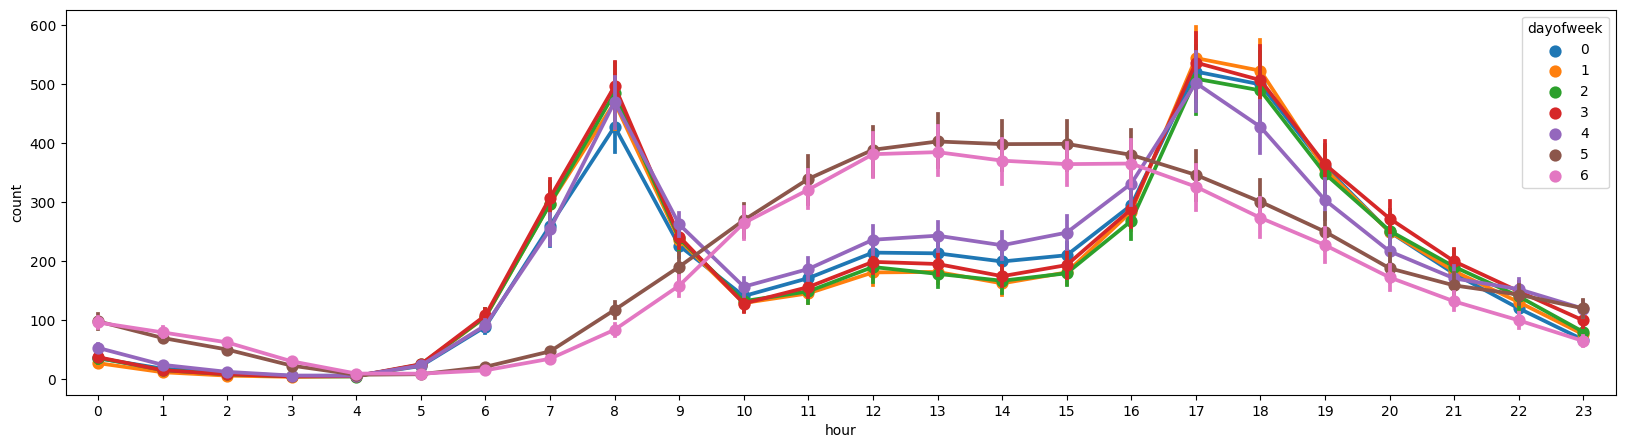

In [ ]:
# dayofweek (카테고리), 시간대별로 point plot 확인
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20,5)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax1)

- dayofweek 의 모든 양상은 비슷하게 나타나지만 예측에는 사용해보도록 한다.


- 결론적으로 year, month, day, hour, weather, holiday, workingday, dayofweek, season을 추후에 예측에 활용해보도록 한다.



## 변수의 상관관계

In [12]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [13]:
corr_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]

In [14]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 765.5 KB


<ipython-input-15-abb91056d9e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_data.corr(), linewidths=0.1, square=True, annot=True, cmap=colormap)


<Axes: >

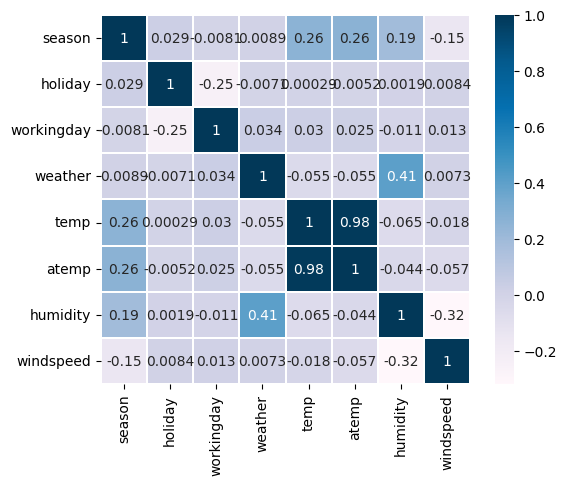

In [15]:
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(), linewidths=0.1, square=True, annot=True, cmap=colormap)

- temp와 atemp의 상관관계가 매우 높아서, 다중공산성이 의심된다.
    - 다중공산성 : 입력 변수들간의 상관관계가 존재하여 회귀계수의 분산을 크게 하기 때문에 회귀분석 시, 추정 회귀계수를 믿을 수 없게되는 문제가 발생
- 따라서  temp 변수 하나만 사용할 것이다

## 온도, 습도, 바람세기에 대해 살펴보기(연속형)


<Axes: xlabel='humidity', ylabel='count'>

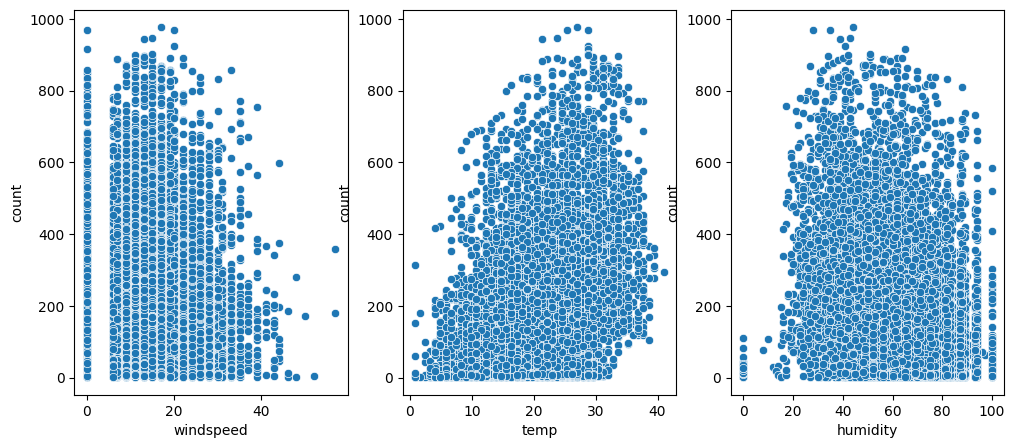

In [16]:
# temp, humidity, windspeed 분포 확인 -> scatterplot

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,5))

sns.scatterplot(data=train, x='windspeed', y='count', ax=ax1)
sns.scatterplot(data=train, x='temp', y='count', ax=ax2)
sns.scatterplot(data=train, x='humidity', y='count', ax=ax3)

- 차례대로 바람세기, 온도, 습도의 데이터 분포를 볼 수 있다. 원래 여기서 나는 별다른 이상한 점을 찾지 못했지만, HONG_YP님의 블로그를 보고 '앗!!!' 하는 엄청난 인사이트를 얻게된다. 이때문에 실제로 캐글의 점수가 상승하는 것을 볼 수 있었다.

- HONG_YP 님께서 캐치하신 인사이트는 바로, '바람 세기가 0인 경우는 거의 없지 않나?' 라는 점이었다. 데이터 분포를 보면, windspeed 변수에 0의 값이 상당히 많이 존재한다.

In [17]:
len(train[train['windspeed']==0])

1313

- 실제로 출력해보니 windspeed에 0 값이 있는 것은 1313개 였고, 10000여개의 데이터중 1313개면 상당히 많은 부분을 차지한다고 생각할 수 있다. 따라서 windspeed가 0 인 것을 대체하는 feature engineering 과정이 하나 더 필요하다.

# Feature Engineering

## 이상치 제거


<Axes: xlabel='count'>

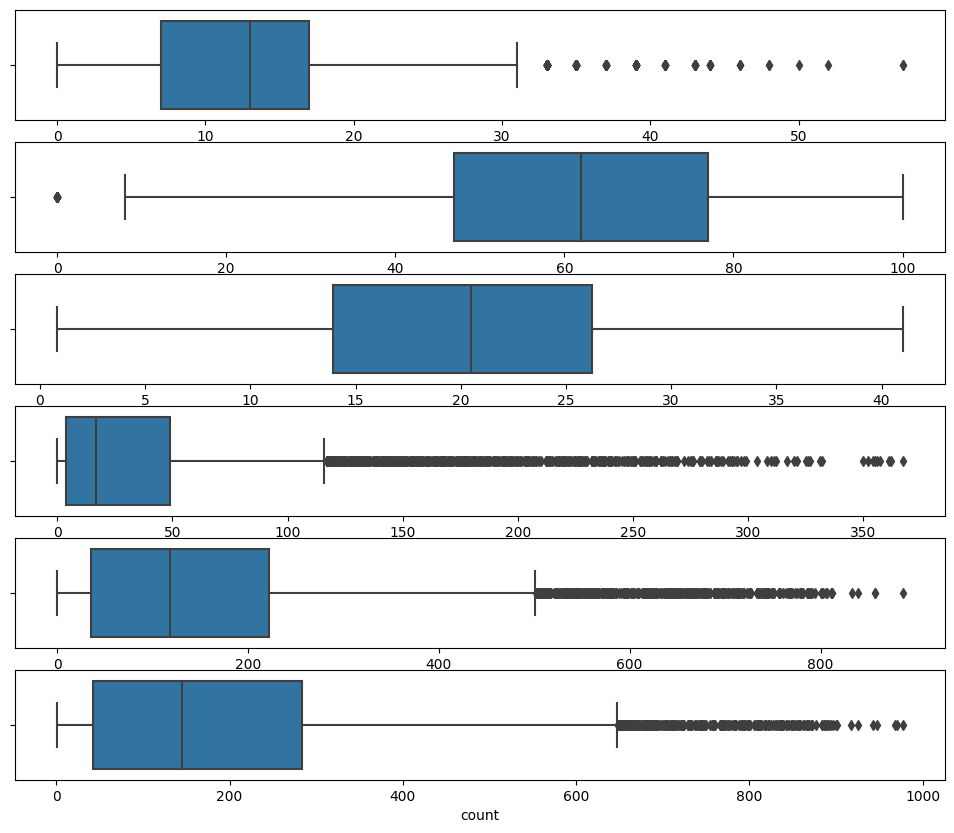

In [18]:
# 연속형 변수에 대한 Boxplot 작성 및 이상치 확인(연속형 변수)
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12,10))
sns.boxplot(data=train, x='windspeed', ax = ax1)
sns.boxplot(data=train, x='humidity', ax = ax2)
sns.boxplot(data=train, x='temp', ax = ax3)
sns.boxplot(data=train, x='casual', ax = ax4)
sns.boxplot(data=train, x='registered', ax = ax5)
sns.boxplot(data=train, x='count', ax = ax6)

In [19]:
# IQR 방식을 사용한 이상치 제거
# 전체 데이터를 오름차순으로 정리한 후, 정확히 4등분한다.
# (25%, 50%, 75%, 100%) 여기서 75%와 25% 지점의 값의 차이를 IQR이라고 부르고,
# 그 이상과 이하에 해당하는 값을 이상치라고 판단하는 방식

from collections import Counter
# 데이터의 개수를 셀 때 매우 유용한 파이썬의 collections 모듈의 Counter 클래스
# Counter 생성자는 여러 형태의 데이터를 인자로 받는데요.
# 중복된 데이터가 저장된 배열을 인자로 넘기면 각 원소가 몇 번씩 나오는지가 저장된 객체를 얻게 됩니다.

def detect_outliers(train, n, cols):
    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(train[col], 25)
        Q3 = np.percentile(train[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = train[(train[col] < Q1 - outlier_step) | (train[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)

    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [20]:
train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4


In [21]:
train.shape

(10886, 19)

In [22]:
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
train.shape

(10846, 19)

## 왜도와 첨도 확인

- 왜도와 첨도의 수치를 보고 데이터의 치우침 정도를 알 수 있기 때문에 중요!


- 왜도
    - 데이터의 분포가 한쪽으로 쏠린것을 의미
    - skew의 수치가 -2~+2 정도가 되어야 치우침이 없는 데이터
    - -2이하는 왼쪽으로 쏠린 데이터 (negative) +2 이상은 오른쪽으로 쏠린 데이터(positive)
        - positive일경우 변환방법 : square root, cube, log(밑10)
        - negative일경우 변환방법 : square, cube root, logarithmic(밑2인log)
- 첨도
    - 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것
    - 한쪽 꼬리부분의 극값과 다른쪽 꼬리의 극값과의 차이를 보여줌
    - 아웃라이어를 찾을 때 주로 사용
    - 첨도가 높다 -> 아웃라이어가 많이 있다

<ipython-input-27-9ad1cde99fcd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(train['count'],


skewness(왜도): 1.210923
kurtosis(첨도): 1.200871


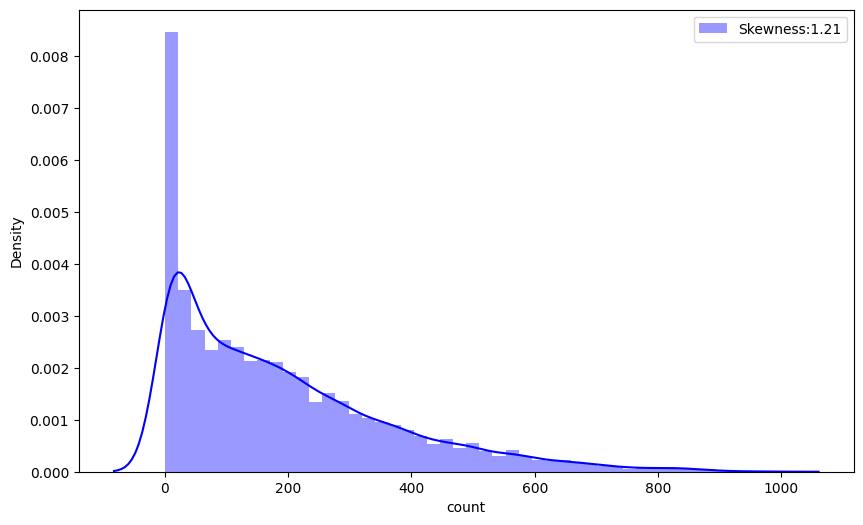

In [27]:
# 왜도와 첨도를 시각화해서 살펴보기
fig, ax = plt.subplots(1,1, figsize = (10, 6))

graph = sns.distplot(train['count'],
                     color = 'b',
                     label = 'Skewness:{:.2f}'.format(train['count'].skew()),
                     ax = ax)

graph = graph.legend(loc = 'best')

print('skewness(왜도): %f' %train['count'].skew())
print('kurtosis(첨도): %f' %train['count'].kurt())

- 수치상으로는 왜도와 첨도에 문제가 없게 출력된다.
- 하지만 데이터의 히스토그램을 보아하니, count 가 0에 굉장히 많이 치우쳐저 있는 것을 확인 할 수 있다. 이때 Log scaling을 통해 정규화 시켜주도록 하자.

- 여기서 주의할 점은, y값인 count 값에 log를 취해주었으니, 마지막에 나온 예측결과값에는 다시 log를 취해주어야 원래 원하던 값이 나온다!!!!

<ipython-input-28-5664eb1af12f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(train['count_log']


skewness(왜도): -0.975198
kurtosis(첨도): 0.247435


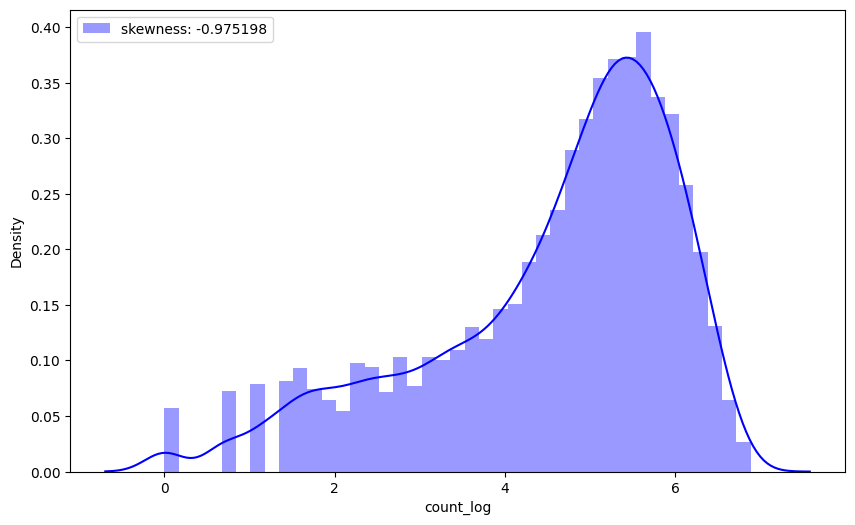

In [28]:
# count값에 log를 취해주어 정규화 해주기
# lambda를 사용해서 로그를 취해준 count값을 count_log 컬럼으로 생성해주자
train['count_log'] = train['count'].map(lambda i:np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1,1, figsize = (10, 6))
graph = sns.distplot(train['count_log']
			, color = 'b'
            , label = 'skewness: {:2f}'.format(train['count_log'].skew())
            , ax = ax)
graph = graph.legend(loc = 'best')

print("skewness(왜도): %f" %train['count_log'].skew())
print("kurtosis(첨도): %f" %train['count_log'].kurt())

#필요없는 count값 없애주기
train.drop('count', axis = 1, inplace = True)

- 왜도와 첨도의 수치도 괜찮게 나왔고, 데이터가 0 하나에만 치우쳐져 있는 것이 개선된 것을 확인
- count_log 값을 예측에 활용할 것이고, 나중에 다시 log를 취해주도록 하자.

## windspeed = 0 대체값 찾기

<< 결측값 처리 방법>>

- 결측값을 앞 방향 혹은 뒷 방향으로 채우기
- 결측값을 변수별 평균으로 채우기
- 결측값을 가진 데이터를 삭제하기
- 결측값을 0 이나, 아예 다른 값으로 (-999) 대체하기
- 결측값을 예측된 값으로 대체하기 (머신러닝을 돌려서)


windspeed가 null값인 경우를 0으로 처리한 것이라고 생각했기에, 결측치를 채우는 방법중에 하나의 방법인 예측된 값으로 대체하는 방법으로 0을 바꾸어주려고 한다.

In [31]:
# RandomForest(동일 알고리즘 n개로 서로 다른 샘플링된 데이터를 훈련에 사용)
# 위 모델을 활용하여 에측값으로 windspeed = 0.0 값을 대체하기 -> 왜 이 모델?
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed']==0]
    windnot0 = data.loc[data['windspeed']!=0] # 학습데이터

    # 풍속이 날씨 변수이기 때문에 날씨 변수를 활용해서 windspeed를 예측해 줄 것
    col = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str') # 정답데이터

    rf = RandomForestClassifier()
    rf.fit(windnot0[col], windnot0['windspeed'])
    pred_wind0 = rf.predict(wind0[col])

    wind0['windspeed'] = pred_wind0
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    return data



In [32]:
train = predict_windspeed(train)
test = predict_windspeed(test)

<ipython-input-31-734b7d859676>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str') # 정답데이터
<ipython-input-31-734b7d859676>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
<ipython-input-31-734b7d859676>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = windnot0.append(wind0)
<ipython-input-31-734b7d859676>:11: SettingWith

In [33]:
# windspeed 0인 값 존재여부 확인
train[train['windspeed']==0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,count_log


<Axes: xlabel='windspeed', ylabel='count'>

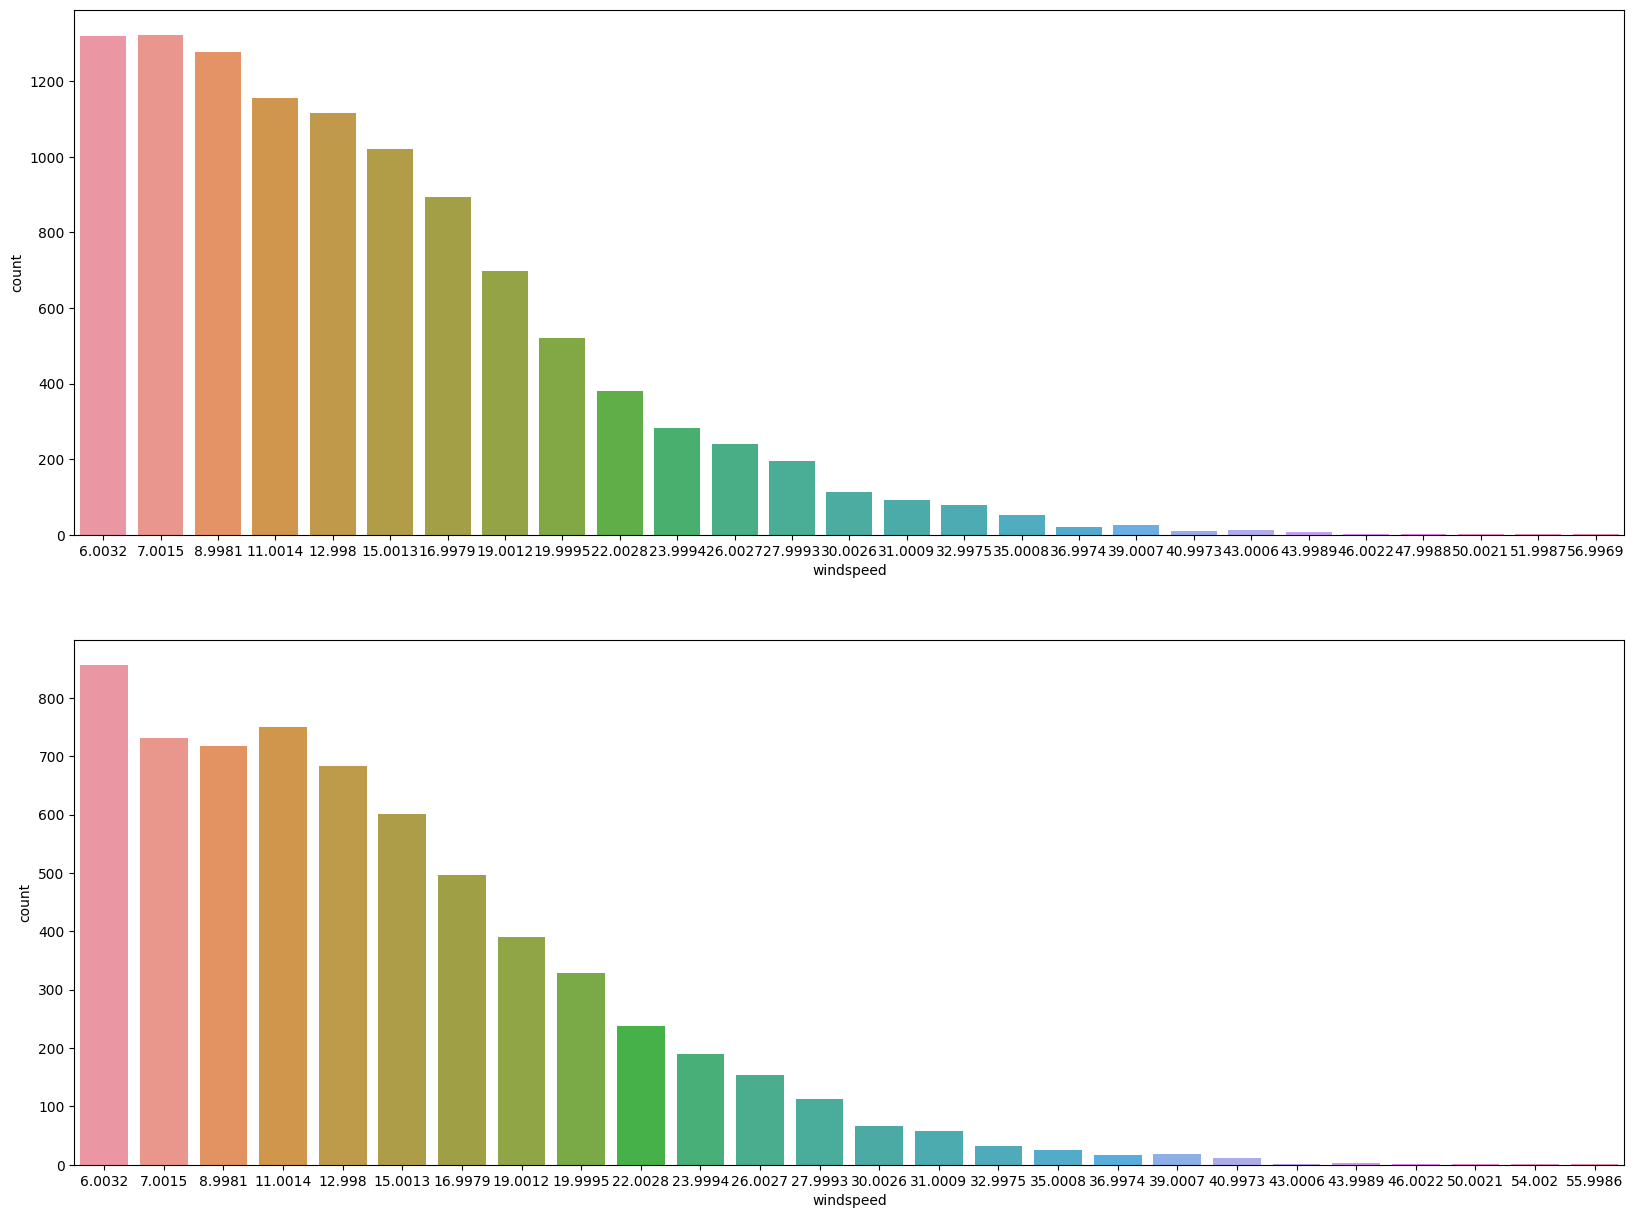

In [35]:
# train과 test의 windspeed 값 시각화
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

# 갯수를 세어야 하니까 countplot
sns.countplot(data=train, x='windspeed', ax=ax1)
sns.countplot(data=test, x='windspeed', ax=ax2)

## one-hot encoding 범주형 변수 처리

- Season	봄(1) 여름(2) 가을(3) 겨울(4)
- Holiday	공휴일(1) 그외(0)
- Workingday	근무일(1) 그외(0)
- Weather	아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박(4)

In [39]:
# 숫자로 된 값이 수치를 의미하는것이 아니니까 원핫인코딩으로 범주형 변수 처리
# prefix, 변수 생성명 앞에 weather_1 이런식으로 생성되게 하는 것

train['weather'] = pd.get_dummies(train, columns = ['weather'], prefix = 'weather')
test['weather'] = pd.get_dummies(test, columns = ['weather'], prefeix = 'weather')

train['season'] = pd.get_dummies(train, columns = ['season'], prefix = 'season')
test['season'] = pd.get_dummies(test, columns = ['season'], prefix = 'season')

train = pd.get_dummies(train, columns = ['holiday'], prefix = 'holiday')
test = pd.get_dummies(test, columns = ['holiday'], prefix = 'holiday')

KeyError: ignored

# 모델링

# 예측